# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [743]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [744]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Dataset/bank_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [745]:
df_bank = pd.read_csv(file_path)
df_bank

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [746]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## Menangani Data yang Hilang

In [747]:
df_bank.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


## Analisis Distribusi dan Korelasi

In [748]:
print("\n=== Statistik Deskriptif Variabel Numerik ===")
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_bank[numeric_cols].describe()


=== Statistik Deskriptif Variabel Numerik ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


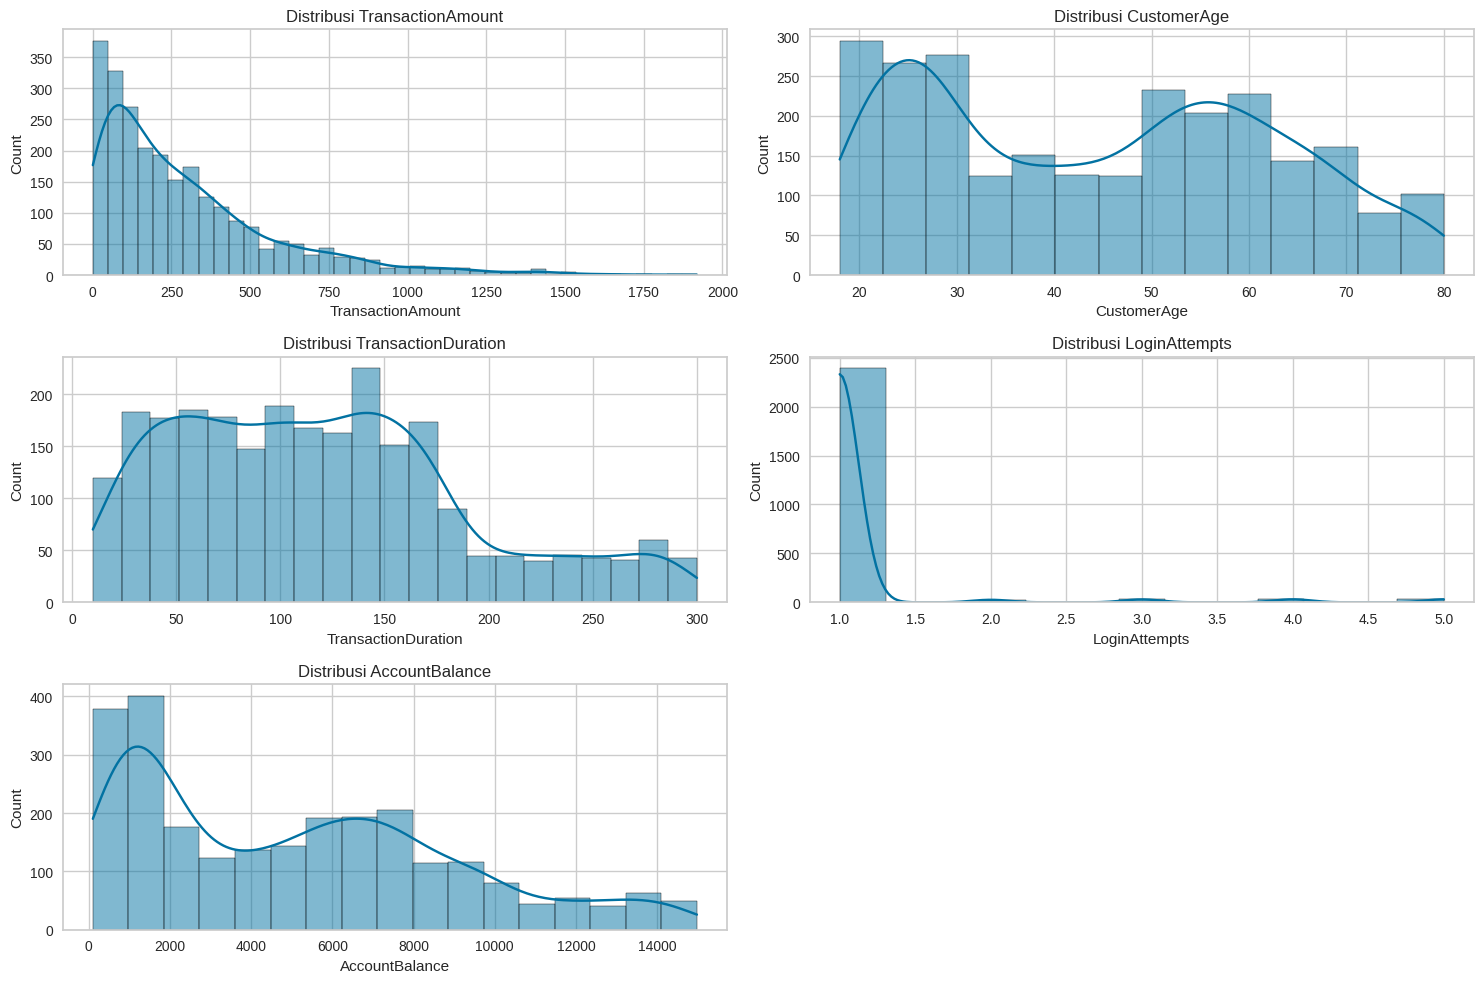

In [749]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_bank[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

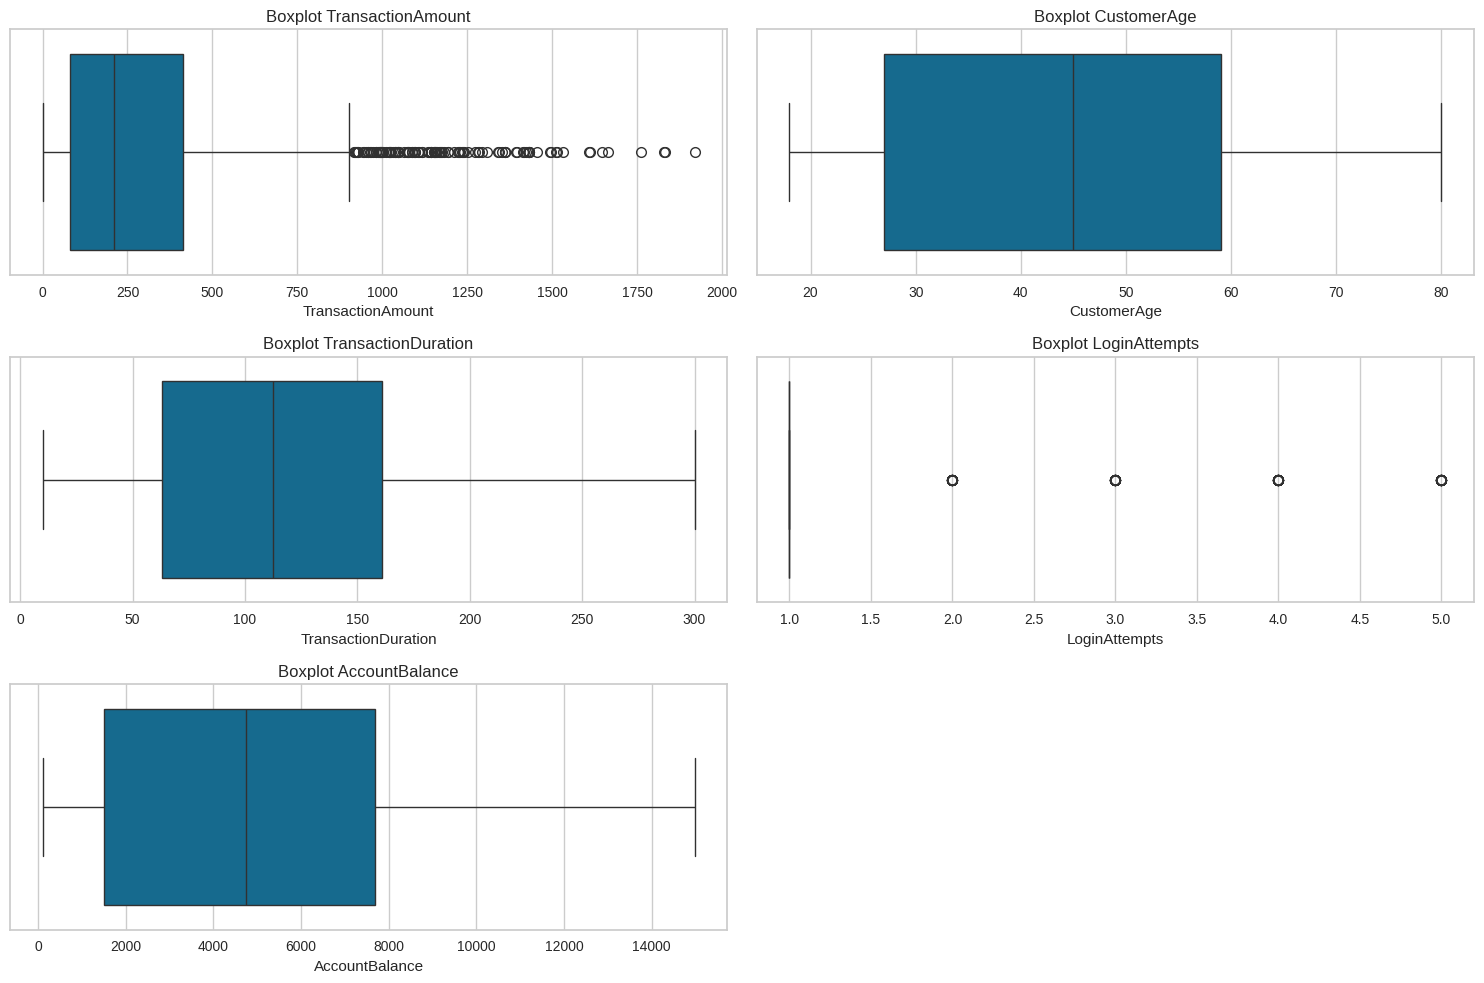

In [750]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_bank[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [751]:
print("\n=== Matriks Korelasi ===")
correlation_matrix = df_bank[numeric_cols].corr()
correlation_matrix


=== Matriks Korelasi ===


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


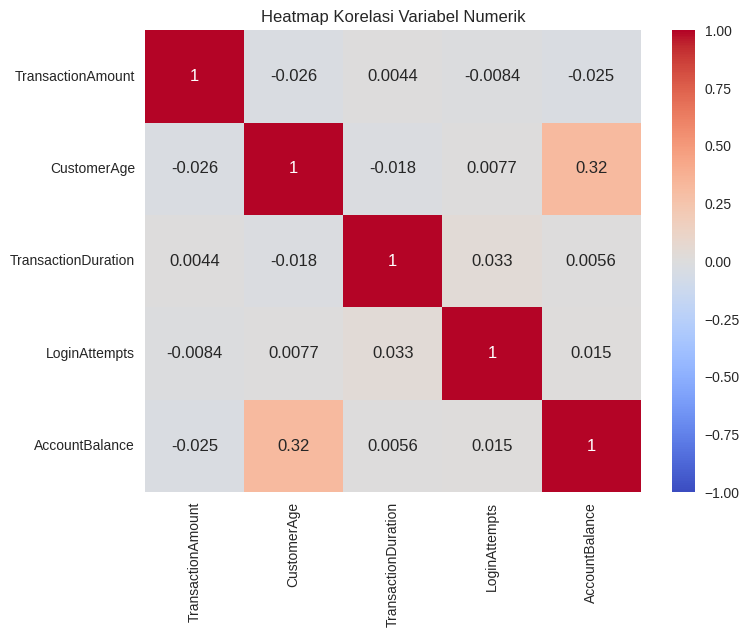

In [752]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

## Visualisasi Data

In [753]:
categorical_cols = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
id_cols = ['TransactionID', 'AccountID']
datetime_cols = ['TransactionDate', 'PreviousTransactionDate']

In [754]:
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])
df_bank['PreviousTransactionDate'] = pd.to_datetime(df_bank['PreviousTransactionDate'])


=== Visualisasi Kolom Kategorikal ===


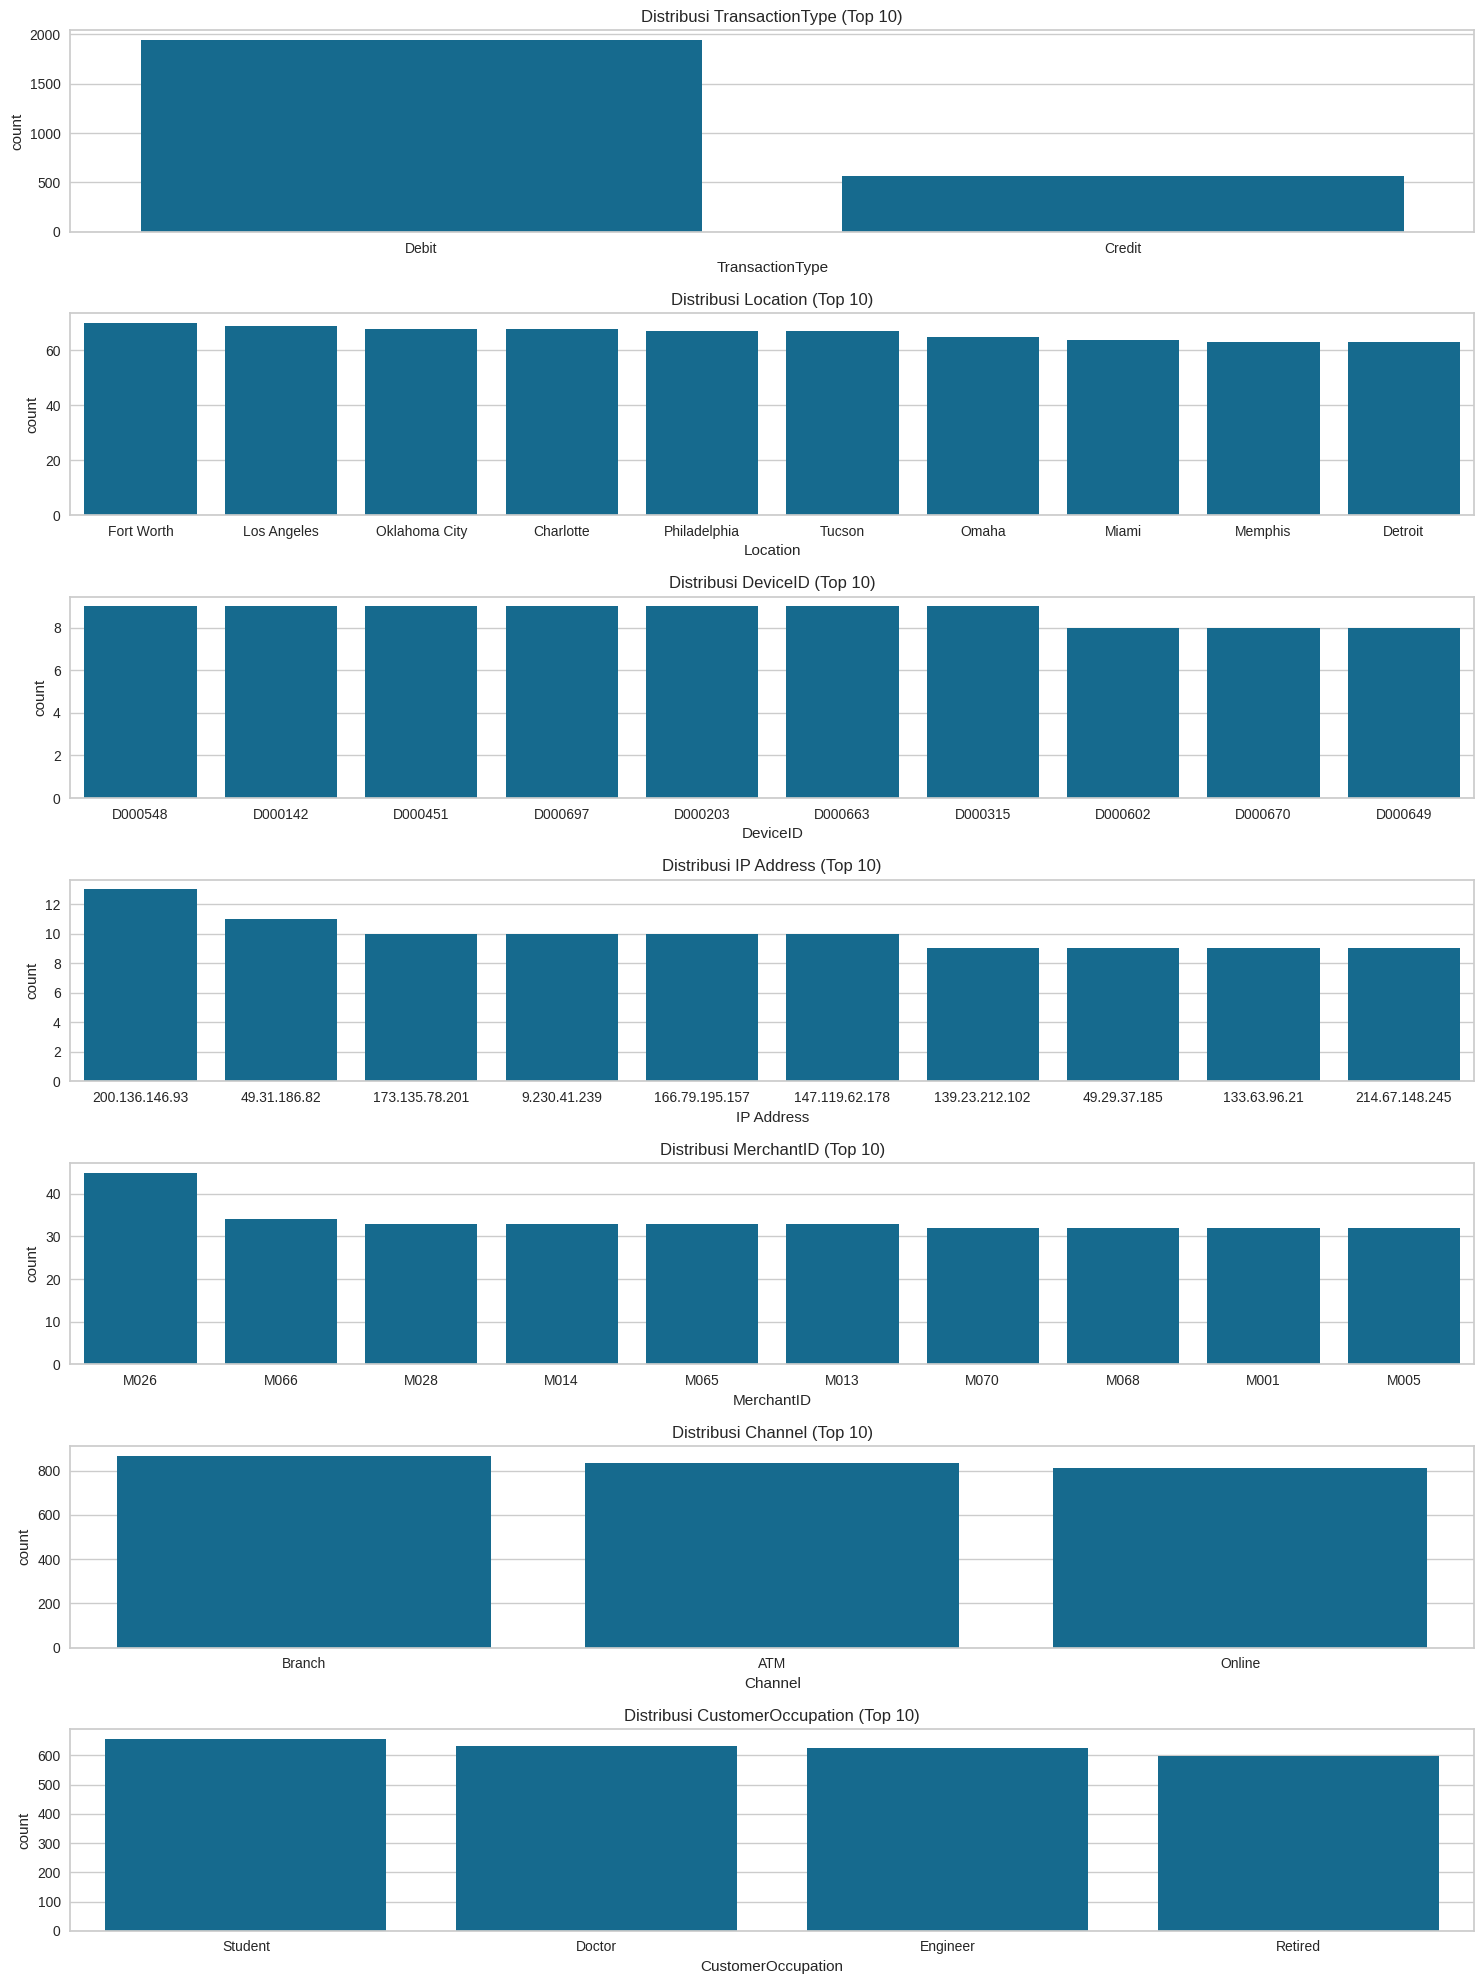

In [755]:
print("\n=== Visualisasi Kolom Kategorikal ===")
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    top_categories = df_bank[col].value_counts().index[:10]
    sns.countplot(x=col, data=df_bank[df_bank[col].isin(top_categories)], order=top_categories)
    plt.title(f'Distribusi {col} (Top 10)')
plt.tight_layout()
plt.show()


=== Visualisasi Kolom ID ===


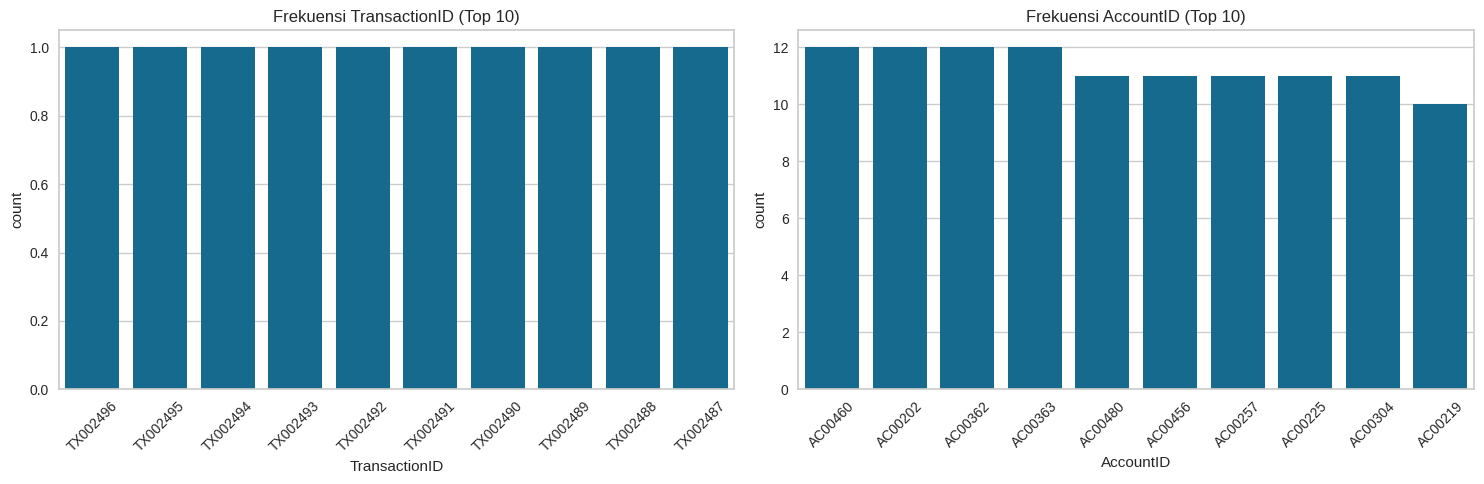

In [756]:
print("\n=== Visualisasi Kolom ID ===")
plt.figure(figsize=(15, 5))
for i, col in enumerate(id_cols, 1):
    plt.subplot(1, 2, i)
    top_ids = df_bank[col].value_counts().index[:10]
    sns.countplot(x=col, data=df_bank[df_bank[col].isin(top_ids)], order=top_ids)
    plt.title(f'Frekuensi {col} (Top 10)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== Visualisasi Kolom Datetime ===


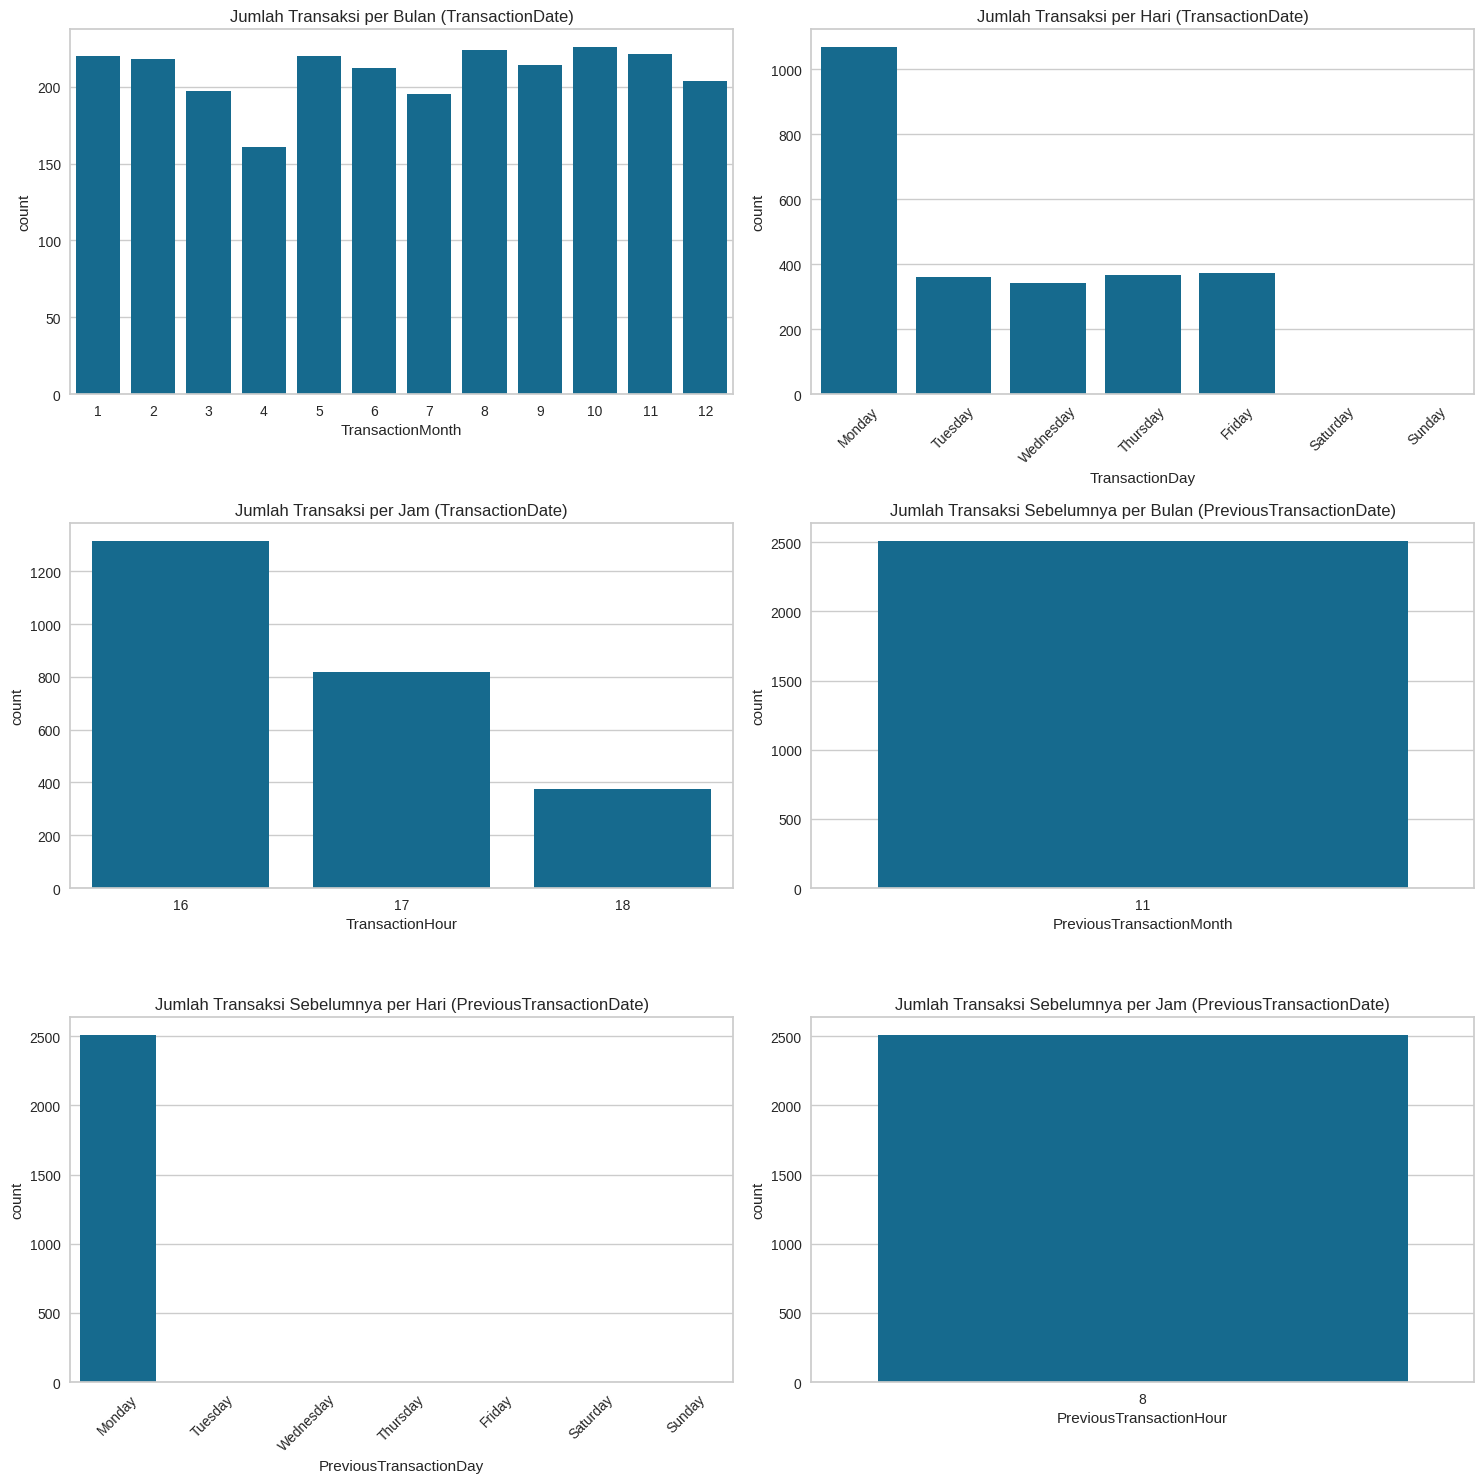

In [757]:
print("\n=== Visualisasi Kolom Datetime ===")


df_bank['TransactionMonth'] = df_bank['TransactionDate'].dt.month
df_bank['TransactionDay'] = df_bank['TransactionDate'].dt.day_name()
df_bank['TransactionHour'] = df_bank['TransactionDate'].dt.hour


df_bank['PreviousTransactionMonth'] = df_bank['PreviousTransactionDate'].dt.month
df_bank['PreviousTransactionDay'] = df_bank['PreviousTransactionDate'].dt.day_name()
df_bank['PreviousTransactionHour'] = df_bank['PreviousTransactionDate'].dt.hour

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='TransactionMonth', data=df_bank)
plt.title('Jumlah Transaksi per Bulan (TransactionDate)')


plt.subplot(3, 2, 2)
sns.countplot(x='TransactionDay', data=df_bank, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Jumlah Transaksi per Hari (TransactionDate)')
plt.xticks(rotation=45)


plt.subplot(3, 2, 3)
sns.countplot(x='TransactionHour', data=df_bank)
plt.title('Jumlah Transaksi per Jam (TransactionDate)')


plt.subplot(3, 2, 4)
sns.countplot(x='PreviousTransactionMonth', data=df_bank)
plt.title('Jumlah Transaksi Sebelumnya per Bulan (PreviousTransactionDate)')


plt.subplot(3, 2, 5)
sns.countplot(x='PreviousTransactionDay', data=df_bank, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Jumlah Transaksi Sebelumnya per Hari (PreviousTransactionDate)')
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)
sns.countplot(x='PreviousTransactionHour', data=df_bank)
plt.title('Jumlah Transaksi Sebelumnya per Jam (PreviousTransactionDate)')

plt.tight_layout()
plt.show()


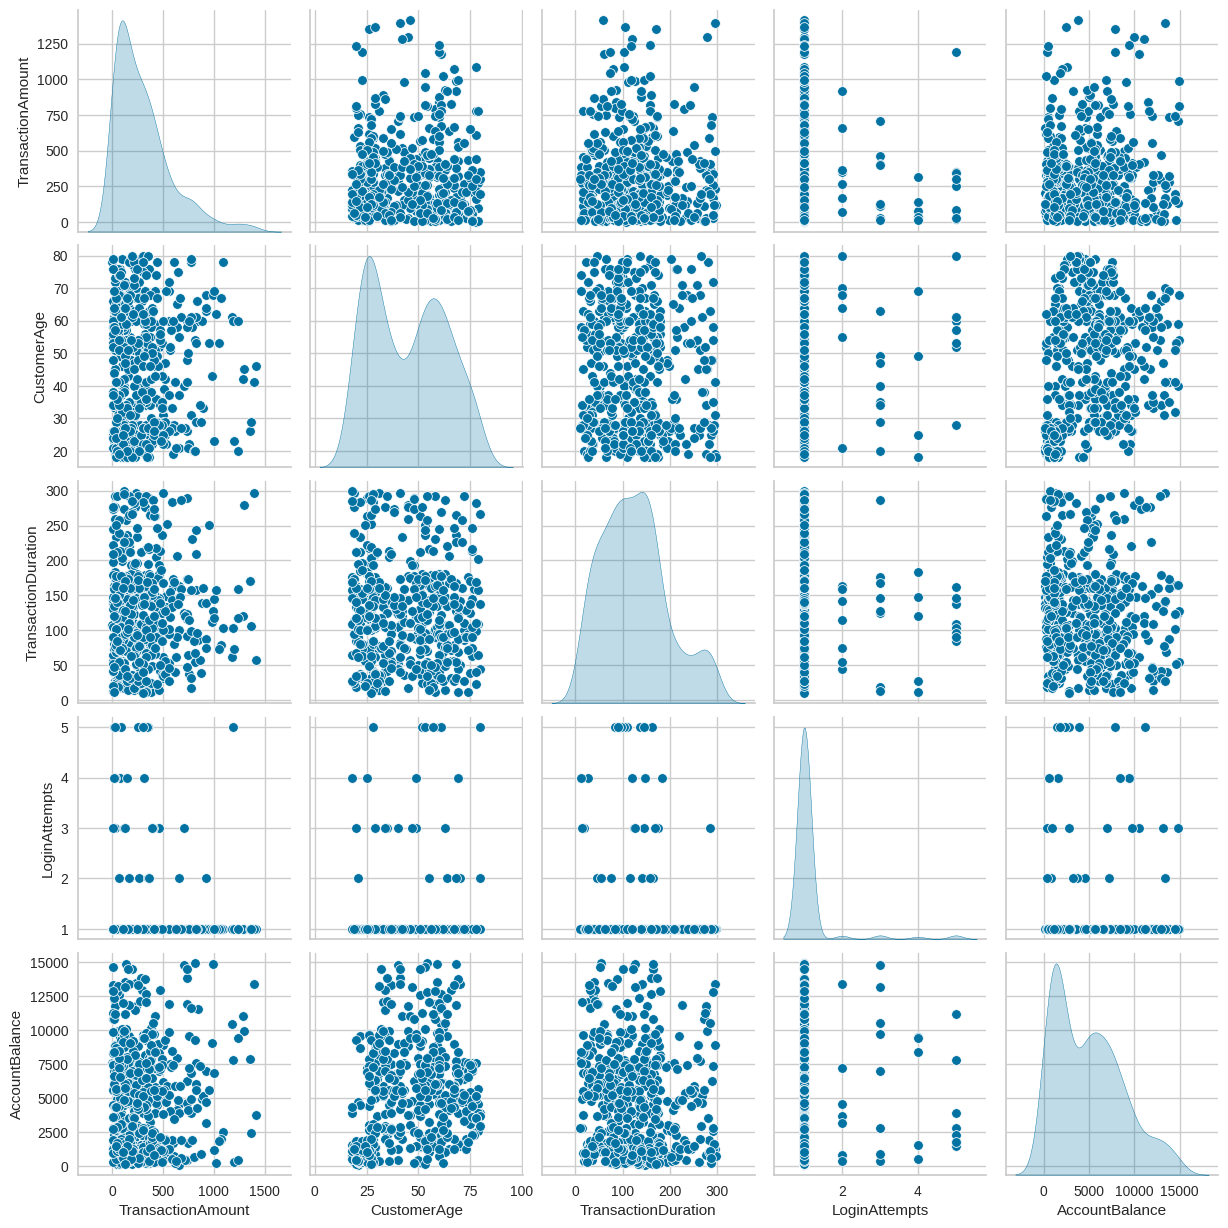

In [758]:
sns.pairplot(df_bank[numeric_cols].sample(500), diag_kind='kde')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [759]:
df_bank.duplicated().sum()

np.int64(0)

In [760]:
print("\n=== Deteksi dan Penanganan Outlier ===")
numeric_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance']

for col in numeric_cols:
    Q1 = df_bank[col].quantile(0.25)
    Q3 = df_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_bank[(df_bank[col] < lower_bound) | (df_bank[col] > upper_bound)][col]
    print(f"Outlier pada {col}: {len(outliers)} data")

    df_bank[col] = df_bank[col].clip(lower=lower_bound, upper=upper_bound)


=== Deteksi dan Penanganan Outlier ===
Outlier pada TransactionAmount: 113 data
Outlier pada CustomerAge: 0 data
Outlier pada AccountBalance: 0 data


In [761]:
df_bank = df_bank[~((df_bank[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_bank[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [762]:
print("\nStatistik deskriptif setelah penanganan outlier:")
print(df_bank[numeric_cols].describe())


Statistik deskriptif setelah penanganan outlier:
       TransactionAmount  CustomerAge  AccountBalance
count        2512.000000  2512.000000     2512.000000
mean          284.847250    44.673965     5114.302966
std           252.067285    17.792198     3900.942499
min             0.260000    18.000000      101.250000
25%            81.885000    27.000000     1504.370000
50%           211.140000    45.000000     4735.510000
75%           414.527500    59.000000     7678.820000
max           913.491250    80.000000    14977.990000


In [763]:
selected_features = ['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df_bank = df_bank[selected_features]

In [764]:
categorical_features = ['TransactionType', 'Channel']
numerical_features = ['TransactionAmount', 'TransactionDuration','CustomerAge', 'AccountBalance']

In [765]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_bank[categorical_features])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

In [766]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_bank[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)
df_pre_feature_selection = pd.concat([numerical_df, categorical_df], axis=1)
print("\n=== Data Setelah Preprocessing (5 Baris Pertama) ===")
df_pre_feature_selection.head()


=== Data Setelah Preprocessing (5 Baris Pertama) ===


,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015144,0.244828,0.838710,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.411703,0.451724,0.806452,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.138004,0.158621,0.016129,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.201745,0.051724,0.129032,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014443,0.648276,0.129032,0.492591,1.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [767]:
kmeans_before = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_before = kmeans_before.fit_predict(df_pre_feature_selection)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [768]:

silhouette_before = silhouette_score(df_pre_feature_selection, clusters_before)
print(f"Silhouette Score sebelum feature selection: {silhouette_before:.2f}")

Silhouette Score sebelum feature selection: 0.30


In [769]:
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_selected)
    silhouette = silhouette_score(X_selected, clusters)
    silhouette_scores.append(silhouette)
    print(f"Silhouette Score untuk k={k}: {silhouette:.2f}")

Silhouette Score untuk k=2: 0.49
Silhouette Score untuk k=3: 0.71
Silhouette Score untuk k=4: 0.86
Silhouette Score untuk k=5: 0.95
Silhouette Score untuk k=6: 1.00
Silhouette Score untuk k=7: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Silhouette Score untuk k=8: 1.00
Silhouette Score untuk k=9: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Silhouette Score untuk k=10: 1.00


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [770]:
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(df_pre_feature_selection, clusters_before)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


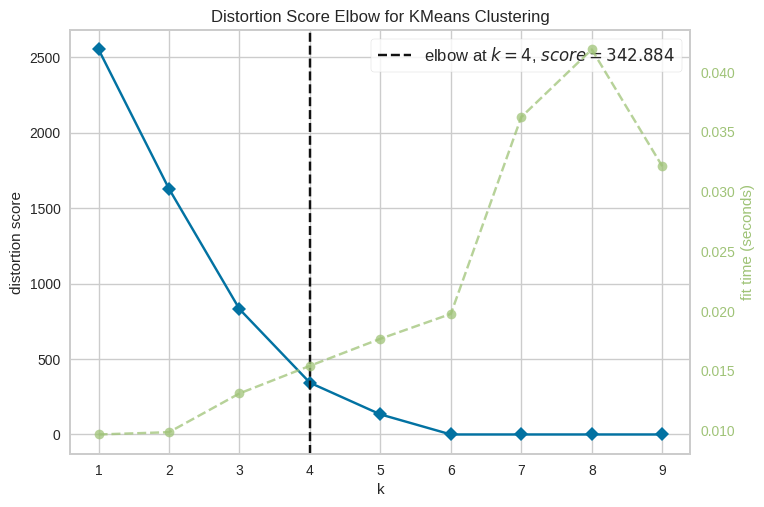

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [771]:
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_selected)
visualizer.show()

In [772]:
print("\n=== Clustering dengan K-Means (Setelah Feature Selection) ===")
kmeans_after = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_after = kmeans_after.fit_predict(X_selected)

silhouette_after = silhouette_score(X_selected, clusters_after)
print(f"Silhouette Score setelah feature selection: {silhouette_after:.2f}")


df_selected['Cluster'] = clusters_after


=== Clustering dengan K-Means (Setelah Feature Selection) ===
Silhouette Score setelah feature selection: 0.86


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Jumlah data points: 2512
Jumlah cluster: 4
Explained Variance Ratio: [0.41452619 0.32903384]


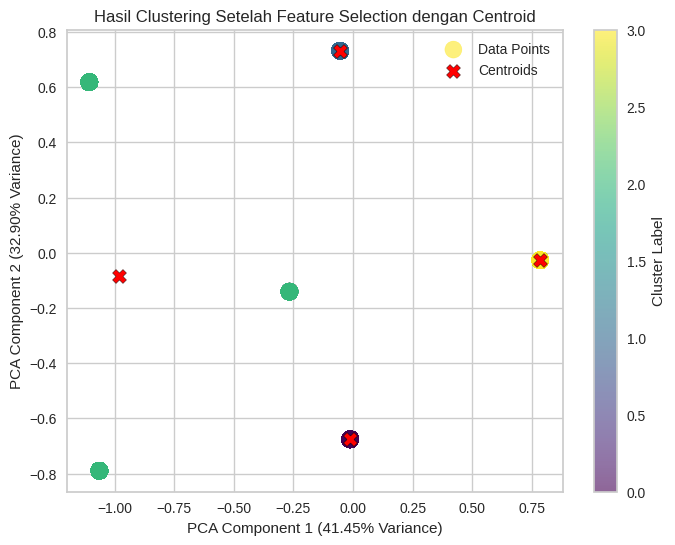

In [797]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

print(f"Jumlah data points: {X_pca.shape[0]}")
print(f"Jumlah cluster: {len(np.unique(clusters_after))}")


explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_after, cmap='viridis', alpha=0.6, s=150, label="Data Points")  # Increased marker size
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, edgecolors='black', label="Centroids")


plt.colorbar(scatter, label="Cluster Label")
plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah Feature Selection dengan Centroid')
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [774]:

df_pre_feature_selection['Cluster'] = kmeans_after.labels_

In [775]:
categorical_encoded_cols = encoder.get_feature_names_out()

df_pre_feature_selection[['TransactionType', 'Channel']] = encoder.inverse_transform(
    df_pre_feature_selection[categorical_encoded_cols]
)



In [776]:
df_pre_feature_selection.head()

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,Cluster,TransactionType,Channel
0,0.015144,0.244828,0.838710,0.336832,0.0,1.0,1.0,0.0,0.0,3,Debit,ATM
1,0.411703,0.451724,0.806452,0.918055,0.0,1.0,1.0,0.0,0.0,3,Debit,ATM
2,0.138004,0.158621,0.016129,0.068637,0.0,1.0,0.0,0.0,1.0,0,Debit,Online
3,0.201745,0.051724,0.129032,0.569198,0.0,1.0,0.0,0.0,1.0,0,Debit,Online
4,0.014443,0.648276,0.129032,0.492591,1.0,0.0,0.0,0.0,1.0,2,Credit,Online


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [777]:
df_pre_feature_selection[numerical_features] = scaler.inverse_transform(df_pre_feature_selection[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [778]:
columns_to_drop = ['TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']

df_normalized = df_pre_feature_selection.drop(columns=columns_to_drop)
df_normalized['Cluster'] = df_normalized['Cluster'] + 1

df_normalized.head(20)

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,Cluster,TransactionType,Channel
0,14.09,81.0,70.0,5112.21,4,Debit,ATM
1,376.24,141.0,68.0,13758.91,4,Debit,ATM
2,126.29,56.0,19.0,1122.35,1,Debit,Online
3,184.50,25.0,26.0,8569.06,1,Debit,Online
4,13.45,198.0,26.0,7429.40,3,Credit,Online
5,92.15,172.0,18.0,781.68,4,Debit,ATM
6,7.08,139.0,37.0,13316.71,3,Credit,ATM
7,171.42,291.0,67.0,2796.24,3,Credit,Branch
8,106.23,86.0,51.0,9095.14,3,Credit,Branch
9,815.96,120.0,55.0,1021.88,4,Debit,ATM


In [779]:

df_normalized.groupby('Cluster').mean(numeric_only=True)

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance
Cluster,,,,
1,287.006074,119.839506,43.460317,4850.068942
2,265.830829,116.808752,43.930308,5276.825656
3,295.144166,119.394366,46.153169,5249.332799
4,290.979395,121.984211,45.077632,5078.575658


In [780]:
df_normalized.groupby('Cluster').median(numeric_only=True)

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance
Cluster,,,,
1,207.65,113.0,41.0,4384.950
2,186.55,111.0,43.0,5327.030
3,223.36,109.0,48.0,4830.895
4,217.90,115.5,46.0,4473.135


In [781]:

df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])


,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,TransactionType,Channel
Cluster,,,,,,
1,913.49125,68.0,28.0,101.25,Debit,Online
2,913.49125,63.0,26.0,117.98,Debit,Branch
3,913.49125,109.0,26.0,1400.04,Credit,Branch
4,913.49125,88.0,27.0,112.76,Debit,ATM


In [782]:
df_normalized.groupby(['Cluster', 'TransactionType'])['TransactionType'].count().unstack(fill_value=0)

TransactionType,Credit,Debit
Cluster,,
1,0,567
2,0,617
3,568,0
4,0,760


Tulis hasil interpretasinya di sini.
1. Cluster 1:

- **Rata rata Jumlah transaksi (*TransactionAmount*)**  : $287.00 kedua terendah.

- **Rata rata Durasi transaksi (*TransactionDuration*)** : 119.84 detik kedua terlama.

- **Rata rata Saldo akun (*AccountBalance*)** : $4850.07 kedua tertinggi.

- **Usia rata-rata** : 43.46 tahun kedua termuda.

- **Rata rata Tipe transaksi** : 100% Debit 0 Credit, 567 Debit.

- **Analisis** : Cluster ini terdiri dari nasabah dengan saldo tinggi tetapi transaksi kecil. Durasi transaksi lama menunjukkan ketelitian atau transaksi kompleks. Usia lebih muda mengindikasikan mereka aktif namun jarang bertransaksi, lebih suka menabung. Mereka lebih sering menggunakan transaksi debit, menunjukkan preferensi pembayaran langsung tanpa kredit.


2. Cluster 2:
- **Jumlah transaksi (*TransactionAmount*)**: $265.83 (terendah) .

- **Durasi transaksi (*TransactionDuration*)**: 116.81 detik (terpendek dibandinng cluster lainnya).
- **Saldo akun **(*AccountBalance*)**: $5276.83 (tertinggi, mengindikasikan nasabah dengan tabungan tertinnggi).
- **Usia rata-rata**: 43.93 tahun (ketiga termuda).
- **Tipe transaksi**: 100% Debit (0 Credit, 617 Debit).
- **Analisis**: Cluster ini terdiri dari nasabah dengan saldo tertinggi, transaksi terendah, dan durasi transaksi tersingkat. Mereka sangat pasif, lebih suka menabung. Usia relatif muda menunjukkan mereka mungkin baru mulai menabung. Mereka lebih sering menggunakan debit, menunjukkan kecenderungan menghindari kredit.

3. Cluster 3:
- **Jumlah transaksi (*TransactionAmount*)**: $295.14 (kedua tertinggi).

- **Durasi transaksi (*TransactionDuration*)**: 119.34 detik (ketiga terlama).
- **Saldo akun (*AccountBalance*)**: $5249.33 (ketiga tertinggi).
- **Usia rata-rata**: 46.13 tahun (Tertua).
- **Tipe transaksi**: 100% Credit (568 Credit, 0 Debit).
- **Analisis**: Cluster ini berisi nasabah yang cukup aktif bertransaksi, dengan jumlah transaksi yang lebih tinggi dibandingkan Cluster 1 dan 2. Durasi transaksi mereka juga cukup lama, menunjukkan bahwa transaksi mereka mungkin lebih kompleks. Saldo akun mereka tinggi, tetapi tidak setinggi Cluster 2. Usia rata-rata yang lebih tua menunjukkan bahwa mereka mungkin nasabah yang lebih berpengalaman dalam bertransaksi. Mereka lebih sering menggunakan transaksi kredit, yang menunjukkan kenyamanan dalam menggunakan fasilitas kredit untuk pembayaran.

4. Cluster 4:
- **Jumlah transaksi (*TransactionAmount*)**: $290.80 (tertinggi).

- **Durasi transaksi *(TransactionDuration*)**: 121.84 detik (paling lama).
- **Saldo akun (*AccountBalance*)**: $5078.58 (terendah).
- **Usia rata-rata**: 45.08 tahun (kedua tertua).
- **Tipe transaksi**: 100% Debit (0 Credit, 760 Debit).
- **Analisis**: Cluster ini terdiri dari nasabah yang paling aktif bertransaksi, dengan jumlah transaksi tertinggi dan durasi transaksi paling lama. Namun, saldo akun mereka adalah yang terendah, menunjukkan bahwa mereka mungkin sering bertransaksi meskipun kapasitas finansialnya terbatas. Usia rata-rata yang kedua tertinggi menunjukkan bahwa mereka adalah nasabah yang lebih berpengalaman, tetapi memiliki tabungan yang lebih kecil. Mereka lebih sering menggunakan transaksi debit, menunjukkan preferensi untuk pembayaran langsung tanpa menggunakan kredit.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [783]:
df_normalized.to_csv("Dataset_clustering.csv", index=False)